# Uygulama Notları: 4
## FİZ220 - Bilgisayar Programlama II | 01/04/2020

**Matrisler I (NumPy Dizi (_numpy.ndarray_) Nesneleri)**

NumPy'ın N-boyutlu Dizileri (ndarray)
* Tanımlama
* Matris Elemanlarına Erişim ve Değiştirme
  * Bölgesel erişim
  * Matris Elemanlarını Değiştirmek
* Matrise Eleman Ekleme
  * Sihirbazlık: Değişkenleri kopyalamak ('copy')
  * append
  * insert
  * concatenate
* Matristen Eleman Silme
* Gelecek program...

Dr. Emre S. Taşcı, emre.tasci@hacettepe.edu.tr  
Fizik Mühendisliği Bölümü  
Hacettepe Üniversitesi

## NumPy'ın N-boyutlu Dizileri (ndarray)
Bu dersimizde bundan böyle epey bir zaman kullanacağımız etkili ve hızlı NumPy dizilerini göreceğiz. Aslında teknik olarak _dizi_ dense de, bizim temel kullanım amacımız matrisler şeklinde olacak.

### Tanımlama
Bir NumPy dizisini, cinsiyle (yani "np.ndarray"), boş veya ilk değerli olarak tanımlarız. Python dizileri ile benzer olarak, bir liste bir kez oluşturulduktan sonra eleman ekleme/çıkarma yaparken aslında -çok da çaktırmadan- yerine yeni bir liste oluşturulur.

Tanımlama için normal dizilerdeki gibi köşeli parantezler kullanırız:

In [1]:
import numpy as np
mat1 = np.array([0,1,2,3,4])
print(mat1)

[0 1 2 3 4]


İki boyutlu bir matrisi iç içe geçmiş köşeli parantezler içinde (satır gruplu olarak) belirtiyoruz:

In [2]:
mat2 = np.array([[0,1,2],[3,4,5]])
print(mat2)

[[0 1 2]
 [3 4 5]]


Peki ya üç boyutlu bir matrisi?... (Siz düşünün cevabı sonra 8)

### Matris Elemanlarına Erişim ve Değiştirme
Matrisimizin elemanlarına tıpkı normal dizilerde veya matrix nesnelerinde olduğu gibi köşeli parantezlerle erişebiliriz. Yalnız, onlardan farklı olarak, birden yüksek boyutlu olan matrislerin -tek bir elemana dair(!)- çoklu indislerini belirtirken, hepsini aynı köşeli parantezlerde yazabileceğimiz gibi, ayrı köşeli parantezlerde de belirtebiliriz (fakat ileride bahsedileceği üzere, özellikle çoklu seçimlerde ayrı köşeli parantezlerin bambaşka bir anlamı olduğundan, mümkün mertebe aynı parantezler içindeki notasyonu kullanın).

In [3]:
import numpy as np

mat2 = np.array([[0,1,2],[3,4,5]])
print("Matrisimiz mat2:\n",mat2)
print("---------")
print("Matrisimizin sağ alttaki elemanı: mat2[1,2] = ",mat2[1,2])
print("Aynı elemanı bir de mat2[1][2] ile çağıralım: ",mat2[1][2])

Matrisimiz mat2:
 [[0 1 2]
 [3 4 5]]
---------
Matrisimizin sağ alttaki elemanı: mat2[1,2] =  5
Aynı elemanı bir de mat2[1][2] ile çağıralım:  5


#### Bölgesel erişim
Matrisimizin elemanlarına 'bölgesel' (yani, aralık belirterek) de erişebiliriz: bunun için ":" aralık operatörünü kullanabiliriz (aralık operatörünün kullanımı ve özelliklerine dair detaylı bilgiyi 2. kısım olan Listeler'in "Liste elemanlarına ulaşma" bölümünde bulabilirsiniz):

In [4]:
import numpy as np

mat2 = np.array([[0,1,2],[3,4,5],[6,7,8]])
print(mat2)
print(mat2[1:3,1:3])

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[4 5]
 [7 8]]


Eğer çağrı aralığımız bir sütun vektörü döndürüyorsa, Python bunu satır vektörü olarak sunacaktır:

In [5]:
mat2 = np.array([[0,1,2],[3,4,5],[6,7,8]])
print(mat2)

# Butun satirlarin son sutunu
mat2_son_sutun = mat2[:,2]
print(mat2_son_sutun) 

# Butun satirlarin son iki sutunu
mat2_son_2sutun = mat2[:,1:3]
print(mat2_son_2sutun) 

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[2 5 8]
[[1 2]
 [4 5]
 [7 8]]


Bu (tek sütunlu vektörlerin satır vektörü olarak dönmesi) çok büyük bir sorun değil, çaresini şimdi verelim, detayını ileride göreceğiz: `reshape()` metodu:

In [6]:
mat2 = np.array([[0,1,2],[3,4,5],[6,7,8]])
print(mat2)

# Butun satirlarin son sutunu
mat2_son_sutun = mat2[:,2]
print(mat2_son_sutun) 

print("\nSihirli 'reshape' çekelim:\n",mat2_son_sutun.reshape(-1,1))

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[2 5 8]

Sihirli 'reshape' çekelim:
 [[2]
 [5]
 [8]]


Dizilerin aksine, bir blok olmayan (yani aralarında boşluk olan) bölgelerden de elemanlara erişebiliriz. Örneğin, `mat2` matrisimizin ilk ve son sütunlarını alalım:

In [7]:
mat2 = np.array([[0,1,2],[3,4,5],[6,7,8]])
print(mat2)

print("\nİlk (0.) ve son (2.) sütunlar:")
mat2_ilk_ve_son_sutunlar = mat2[:,[0,2]]
print(mat2_ilk_ve_son_sutunlar) 

[[0 1 2]
 [3 4 5]
 [6 7 8]]

İlk (0.) ve son (2.) sütunlar:
[[0 2]
 [3 5]
 [6 8]]


İndis belirtirken, başlangıç için nasıl 0 kullanıyorsak, sonuncu için de `end` veya `-1` kullanabiliriz; benzer şekilde `-2` "sondan ikinci", `-3` "sondan üçüncü", vs.. olarak işlenir. Uygulama olarak $(3\times5)$'lik bir matrisin sondan 2. ve 3. sütunlarına erişelim:

In [8]:
mat_3x5 = np.arange(0,15).reshape(3,5)
mat_3x5 = np.array([[ 0,  1,  2,  3,  4],
 [ 5,  6,  7,  8,  9],
 [10, 11, 12, 13, 14]])
print(mat_3x5)
print("---------")
print("Matrisimizin sondan 2. ve 3. sütunları:")
print(mat_3x5[:,[-2,-3]])

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
---------
Matrisimizin sondan 2. ve 3. sütunları:
[[ 3  2]
 [ 8  7]
 [13 12]]


Aralıkları tersten arttırarak matrisimizin sütunlarının sırasını tersine de çevirebiliriz:

In [9]:
mat_3x5 = np.arange(0,15).reshape(3,5)
mat_3x5 = np.array([[ 0,  1,  2,  3,  4],
 [ 5,  6,  7,  8,  9],
 [10, 11, 12, 13, 14]])
print(mat_3x5)
print("---------")
print("Matrisimizin sütunlarının tersten sıralanmış hali:")
print(mat_3x5[:,4::-1])

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
---------
Matrisimizin sütunlarının tersten sıralanmış hali:
[[ 4  3  2  1  0]
 [ 9  8  7  6  5]
 [14 13 12 11 10]]


Yukarıdaki örnekte 0. sütun dahil olduğu için aralığımızı `4:0:-1` şeklinde yazamadık çünkü bu (aralık tanımının {başlangıç}:{bitiş (kadar/dahil değil}:{artış miktarı} olmasından ötürü): 4,3,2,1 değerlerini içerir. `0` yerine `-1` koymak başta makul görünse de, -1'in özel bir anlamı var (yukarıda, satır vektörünü sütun vektörüne çevirirken de kullanmıştık, daha sonra kapsamlı olarak değineceğiz), onu da kullanamıyoruz, indislerin tam sayı (ve $\ge0$ - yani -1 de olmuyor teknik olarak ;) olma zorunluluğundan ötürü `-0.2` gibi bir cinlik de yapamıyoruz. Bu tür durumlarda işi "oluruna" yani _boş_ bırakıyoruz: boş bıraktığımızda "tümü" ya da biraz daha gevşek bir deyişle "_gittiği yere kadar..._" şeklinde bir anlam çıkmakta.

#### Matris Elemanlarını Değiştirmek
Erişebilmeyi öğrendikten sonra, değiştirmek çok kolay. Eriştiğiniz matris elemanları ile aynı boyutta olduktan sonra, istediğiniz gibi değiştirebilirsiniz:

In [10]:
import numpy as np

mat_3x5 = np.arange(0,15).reshape(3,5)
mat_3x5 = np.array([[ 0,  1,  2,  3,  4],
 [ 5,  6,  7,  8,  9],
 [10, 11, 12, 13, 14]])
print(mat_3x5)
print("---------")
print("Baştan 2. (indis:1), sondan 2. sütunlar:")
print(mat_3x5[:,[1,-2]])
# Erisebildigimize gore, bunlari degistirelim:
# --(3x2)'lik matris olduguna dikkat ederek--
mat_3x5[:,[1,-2]] = np.array([[11, 13],[21,23], [31,33]])
print("\nBu kısmın değiştirilmiş olduğu hali:")
print(mat_3x5)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
---------
Baştan 2. (indis:1), sondan 2. sütunlar:
[[ 1  3]
 [ 6  8]
 [11 13]]

Bu kısmın değiştirilmiş olduğu hali:
[[ 0 11  2 13  4]
 [ 5 21  7 23  9]
 [10 31 12 33 14]]


### Matrise Eleman Ekleme
Bir matrisi (NumPy dizisini) oluşturmayı, mevcut olan elemanlara erişip, onları değiştirmeyi gördük. Peki ya yeni bir eleman eklemek istersek? İlk akla gelen şekilde "olmayanı yoktran tanımlamak" işe yarar mı? (pek olacak gibi görünmüyor, bir deneyelim bakalım...)

In [11]:
import numpy as np

# (1x5)'lik saf bir matris (vektor) tanimlayalim
matris = np.array([0,1,2,3,4])
print("Matrisimiz:\n",matris)

print("Matrisimizin sonuncu elemanı: ",matris[4])

# 5. elemani (indisi: 4) degistirelim:
matris[4] = 9
print("Matrisimiz:\n",matris)

print("----------------------")

# 6. elemani (indisi: 5) tanimlayarak eklemeye calisalim:
matris[5] = 5 # Bu noktada elimize gecen hata! husran! gozyasi! :~(
print("Matrisimiz:\n",matris)

Matrisimiz:
 [0 1 2 3 4]
Matrisimizin sonuncu elemanı:  4
Matrisimiz:
 [0 1 2 3 9]
----------------------


IndexError: index 5 is out of bounds for axis 0 with size 5

Aldığımız hatanın gerisinde yatan temel sebep, _teknik olarak_ bir matrisin (NumPy dizisinin - bir daha bu ek açıklamayı yapmayacağım) sadece ilk tanımlanışı sırasında boyutunun belirlenebilmesi. 

Pratikte tabii ki bu sıkıntıya düşmüyoruz, birazdan göreceğimiz üzere, genişleme de yapacağız, boyutunu da değiştireceğiz, sileceğiz de, ekleyebileceğiz de. Ama bu teknik kısıtlamanın altında ince bir programlama numarası yatmakta. "Listeler ve sözlükler" başlıklı 2. uygulama notlarında bundan bahsettiysek de, onun ders değil de aslında bir referans notu olmasından ötürü burada bir kez daha değineceğim.

**Sihirbazlık: Değişkenleri kopyalamak ('copy')**  
Bu sihirbazlık numarası için yardımınıza ihtiyacım var:  
1. `a` diye bir değişken düşünüp, ona bir değer atayın (örneğin 3)
2. `b` diye bir değişken düşünüp, onu da `a`ya eşitleyin.  
_(şu anda `a` da, `b` de 3'e eşit, buraya kadar hemfikirizdir umarım)_
3. `a`nın değerini başka bir sayı yapın (örneğin 5).
4. `b`nin şu andaki değeri nedir?

Psikoloji bilimi doğru çalışıyorsa, büyük ihtimalle "5" demişsinizdir ("hoca sorduğuna göre o kadar bariz (3) cevap olamaz, vardır bir şaşırtmaca/hinlik) ama gerçekten de o kadar bariz (yani `b` değerimiz hala 3'e eşit), kendi gözlerinizle görün:

In [12]:
a = 3
b = a
print("a: %d\tb: %d"%(a,b))
print("Şimdi a'nın değerini 5 yapıyoruz...\n(b'ye dokunmuyoruz)")
a = 5
print("a: %d\tb: %d"%(a,b))
print("\n¯\_(ツ)_/¯ -- Duh!")

a: 3	b: 3
Şimdi a'nın değerini 5 yapıyoruz...
(b'ye dokunmuyoruz)
a: 5	b: 3

¯\_(ツ)_/¯ -- Duh!


E sihirbazlık neresinde kaldı bu işin? Tekrar deneyelim... Bir şans daha. Bu sefer dizilerle yapalım:

In [13]:
import numpy as np

dizi_a = np.array([3])
dizi_b = dizi_a
print("a dizisi: ",dizi_a)
print("b dizisi: ",dizi_b)
print("\nŞimdi a dizisinin elemanının değerini 5 yapıyoruz...\n(b dizisine dokunmuyoruz)\n")
dizi_a[0] = 5
print("a dizisi: ",dizi_a)
print("b dizisi: ",dizi_b)


a dizisi:  [3]
b dizisi:  [3]

Şimdi a dizisinin elemanının değerini 5 yapıyoruz...
(b dizisine dokunmuyoruz)

a dizisi:  [5]
b dizisi:  [5]


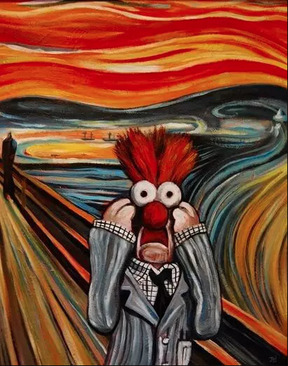  
(James Hence - "The Meep")

Nasıl oldu? Biz b dizisine dokunmamıştık, nasıl oldu da gitti a'yı değiştirince b de değişiverdi? Cevap: dizilerin (yani birden fazla elemanı olan değişkenlerin) hafızada nasıl tutulduğu. Bize ad diye verilen şey aslında onun hafızada tutulduğu yeri gösteren bir işaretçi (_pointer_). Birebir aynı olmasa da bu ilişkiyi _id_'lere bakarak gözlemleyebiliriz:

In [14]:
import numpy as np

dizi_a = np.array([3])
dizi_b = dizi_a
print("a dizisi: ",dizi_a)
print("a dizisinin id'si: ",id(dizi_a))
print("b dizisi: ",dizi_b)
print("b dizisinin id'si: ",id(dizi_b))
print()
print("\nŞimdi a dizisinin elemanının değerini 5 yapıyoruz...\n(b dizisine dokunmuyoruz)\n")
dizi_a[0] = 5
print("a dizisi: ",dizi_a)
print("a dizisinin id'si: ",id(dizi_a))
print("b dizisi: ",dizi_b)
print("b dizisinin id'si: ",id(dizi_b))


a dizisi:  [3]
a dizisinin id'si:  139837491547072
b dizisi:  [3]
b dizisinin id'si:  139837491547072


Şimdi a dizisinin elemanının değerini 5 yapıyoruz...
(b dizisine dokunmuyoruz)

a dizisi:  [5]
a dizisinin id'si:  139837491547072
b dizisi:  [5]
b dizisinin id'si:  139837491547072


Görüldüğü üzere, ikisi de değişiklik yapıldıktan sonra bile aynı yeri işaret ediyorlar. Halbuki ilk örneğimizde:

In [15]:
a = 3
b = a
print("a: %d\tb: %d"%(a,b))
print("a'nın id'si: ",id(a))
print("b'nin id'si: ",id(b))
print("Şimdi a'nın değerini 5 yapıyoruz...\n(b'ye dokunmuyoruz)")
a = 5
print()
print("a: %d\tb: %d"%(a,b))
print("a'nın id'si: ",id(a))
print("b'nin id'si: ",id(b))



a: 3	b: 3
a'nın id'si:  10914560
b'nin id'si:  10914560
Şimdi a'nın değerini 5 yapıyoruz...
(b'ye dokunmuyoruz)

a: 5	b: 3
a'nın id'si:  10914624
b'nin id'si:  10914560


Python'da bir değişken tanımladığımızda, hafızada onun büyüklüğünde bir alan aranır ve o bölgenin başlangıç adresi o değişkenin adı ile ilişkilendirilir. Örneğin (3x4)'lük bir tamsayılar matrisi tanımladığınızda 3x4=12'lik tamsayının kapladığı yer bulunur, o yerin başlangıcı da matrisinizin adına atanır. Yani matrisin adı dediğimiz şey -hemen hemen- onun tutulduğu bölge. `dizi_b = dizi_a` demekle, a dizisinin adresini b dizisine de atamış olduk -- bu bir anahtarı çoğaltmak gibi bir şey! Bu yüzden a dizisinde yaptığımız değişiklik b dizisini de etkiliyor çünkü ikisi de aynı evi gösteriyor! Kardeşinizde de, sizde de birer anahtar var, kardeşiniz halıya vişne suyu döktüğünde, siz eve girince bu lekeyi görüyorsunuz! 8) 

Peki değerleri cinsinden birbirinin aynı ama göbekleri birbirlerine bağlı olmayan iki diziyi nasıl tanımlayacağız o halde? Cevap: `copy` komutu ile:

In [16]:
import numpy as np

dizi_a = np.array([3])
dizi_b = np.copy(dizi_a)
print("a dizisi: ",dizi_a)
print("a dizisinin id'si: ",id(dizi_a))
print("b dizisi: ",dizi_b)
print("b dizisinin id'si: ",id(dizi_b))
print()
print("\nŞimdi a dizisinin elemanının değerini 5 yapıyoruz...\n(b dizisine dokunmuyoruz)\n")
dizi_a[0] = 5
print("a dizisi: ",dizi_a)
print("a dizisinin id'si: ",id(dizi_a))
print("b dizisi: ",dizi_b)
print("b dizisinin id'si: ",id(dizi_b))

a dizisi:  [3]
a dizisinin id'si:  139837491008656
b dizisi:  [3]
b dizisinin id'si:  139837491009376


Şimdi a dizisinin elemanının değerini 5 yapıyoruz...
(b dizisine dokunmuyoruz)

a dizisi:  [5]
a dizisinin id'si:  139837491008656
b dizisi:  [3]
b dizisinin id'si:  139837491009376


Yine bu hafıza/adres meselesi yüzünden, kafamıza göre olmayan bir elemanı yoktan tanımlayamıyoruz: bilgisayar bize diyelim 12'lik yer bulup ayırmış, hemen dibinden bir başka değişken başlıyor, siz kalkıp da 13. elemanı tanımlayamazsınız, kalkıp yandaki komşunun odasına girecek haliniz yok (bu vesileyle son yıllarda hayli güvenli bilgisayarları yakıp kavuran [Heartbleed bug'ı](https://en.wikipedia.org/wiki/Heartbleed) tam da bu şekilde çalışıp bilgileri sızdırıyordu). O nedenle siz "bana 12 odalı ev yetmiyor, 13. odaya ihtiyacım var" dediğinizde, Python da 13 odalı bir ev oluşturup, sizi -pek de çaktırmadan- oraya taşıyor (adresiniz değişiyor haliyle ama no prob. ;).

* **append()** komutu ile eleman ekleme
`append` ile bir matrisin sonuna elemanlar eklenebilir. Dikkat edilmesi gereken husus, bu komutun yeni bir matris döndürdüğüdür: girdi olarak kullanılan matris doğal olarak -siz çıktı olarak kendisini işaret etmezseniz- değişiklik göstermez.

In [17]:
import numpy as np

dizi = np.array([0,1,2,3,4])
print("dizi: \n",dizi)
print("diziye ek yapılmış hali:\n",np.append(dizi,[5,6,7]))
print("dizide bir değişiklik yok: \n",dizi)

print("-----------")

# Degisikligin diziye yapilmasi icin:
dizi = np.append(dizi,[5,6,7])
print("dizi: \n",dizi)

dizi: 
 [0 1 2 3 4]
diziye ek yapılmış hali:
 [0 1 2 3 4 5 6 7]
dizide bir değişiklik yok: 
 [0 1 2 3 4]
-----------
dizi: 
 [0 1 2 3 4 5 6 7]


(tahmin edeceğiniz üzere, baştaki `dizi` ile, ekleme yapılmış `dizi`nin adresleri de, id'leri de farklı).

* **insert()** komutu ile eleman ekleme  
`insert` komutu işleyiş açısından `append`e benzese de, ondan temel farkı ille de sona değil, listenin herhangi bir yerine aradan ekleme yapma imkanı vermesindedir. İlk parametre olarak ekleme yapılacak dizi; ikinci parametre olarak hangi indisin yerinden ekleme yapılacağı (örneğin "2" dersek, 2 indisli (3.) elemanın soluna eklenir, yani eski 2 indisindeki (3.) eleman sağa kayar:

In [18]:
import numpy as np

dizi = np.array([0,1,2,3,4])
print("dizi: \n",dizi)

print("--------")

dizi = np.insert(dizi,2,[99,98,97])
print("dizi: \n",dizi)

dizi: 
 [0 1 2 3 4]
--------
dizi: 
 [ 0  1 99 98 97  2  3  4]


* **concatenate()** ile dizi birleştirme  
Python'da "normal" (standard) dizileri `+` operatörü ile birleştirebiliyorduk. NumPy matrislerinde bu operatör ile gerçek toplama yapabildiğimizden ötürü, yeni bir komuta gerek olmuş, o komut da işte `concatenate`:

In [19]:
import numpy as np

dizi1 = np.array([0,1,2,3,4])
dizi2 = np.array([9,10,15])
dizi3 = np.concatenate((dizi1,dizi2))
print("dizi3: \n",dizi3)

dizi3: 
 [ 0  1  2  3  4  9 10 15]


  * `concatenate` ile yaptığımız her türlü işlemi `append` ile yapabileceğimiz doğrudur fakat `append` fonksiyonu bizzat concatenate ile tanımlanmıştır. [Kaynak koduna](https://github.com/numpy/numpy/blob/master/numpy/ma/core.py) bakacak olursanız (append en altta yer alıyor; korkmayın, bir bakın bence, açık kaynağın, özgür yazılımın en güzel yanlarından biri de bu! 8):
  
 `def append(a, b, axis=None):` 
 
 şeklinde başlıyor tanımı, bir dolu açıklama metni ve tüm bir fonksiyonun kod olarak aslında tek bir satırda tanımlandığını görüyorsunuz: 
 
 `return concatenate([a, b], axis)`
 
 
  * `concatenate`'i burada, bir boyutlu matrisler üzerinde çalışırken gördük ama ileride hem daha yüksek boyutlu matrislere ekleme yapacağız, hem de `vstack` olsun, `hstack` olsun, daha ince işler, kurulumlar yapacağız.

### Matristen Eleman Silme
Silme işlemini `delete` komutu ile yapıyoruz ama hemen kullanmaya kalkmadan biraz düşünelim:

- `Silmek` ile ne kast ediyoruz?

Tamam, `[0,1,2,3,4,5]` gibi bir dizinin diyelim _2 ve 4 indisli elemanlarını silmekten_ bahsedebiliriz, o zaman `[0,1,3,5]` gibi bir şey olur elimize dönen, hatta:

In [20]:
import numpy as np

dizi1 = np.array([0,1,2,3,4,5])
print("dizi1:\n",dizi1)
print("------------")
print(np.delete(dizi1,[2,4]))

dizi1:
 [0 1 2 3 4 5]
------------
[0 1 3 5]


Nefis!... Bravo... vs..

Peki ya elimizde 2 boyutlu bir dizi varsa? 

In [21]:
dizi2 = np.array([[1,2],[3,4],[5,6]])
print("dizi2:\n",dizi2)

dizi2:
 [[1 2]
 [3 4]
 [5 6]]


Bunun _2 ve 4 indisli elemanlarını silmek_ ne demek??? (bkz. _what ne demek?_ 8P).. _1. satırı silelim_, bunu anlarız (Python da anlar), haydi _2. sütunu silelim_ bu da tamam ama _2 ve 4 indisi_ bırakın, _2 indisli elemanı silelim_'in bile 2 boyutlu bir matriste anlamı yok (jenga oynayanlarınız bilir, yapıyı korumak lazım: bir satırında 2 elemanı, bir başka satırında 1 elemanı olan bir matris matematik dünyasında yok (olana da hilkat garibesi muamelesi çekiliyor, girmiyorum o konuya ama çok istiyorsanız bkz. dizi dizileri ya da hücre dizileri)).

Önce bir satırı, sonra bir sütunu uçurup, sonra da tek bir elemanı uçurmaya kalkıp sonuçlara bakalım:

In [22]:
dizi2 = np.array([[1,2,3],[4,5,6],[7,8,9]])
print("dizi2:\n",dizi2)

print("---------")
print("2. satırı uçurduğumuz hali:\n",np.delete(dizi2,1,0))

print("---------")
print("2. sütunu uçurduğumuz hali:\n",np.delete(dizi2,1,1))

print("---------")
print("1. & 3. sütunu uçurduğumuz hali:\n",np.delete(dizi2,[0,2],1))


dizi2:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
---------
2. satırı uçurduğumuz hali:
 [[1 2 3]
 [7 8 9]]
---------
2. sütunu uçurduğumuz hali:
 [[1 3]
 [4 6]
 [7 9]]
---------
1. & 3. sütunu uçurduğumuz hali:
 [[2]
 [5]
 [8]]


Satırlar ve sütunlar gayet iyi uçuyor (satır uçururken `0`, sütun uçururken `1` değerini alan parametre "eksen" parametresi: 2-boyutlu bir matriste birincil (0) eksen x-ekseni (yani satırlar); ikincil (1) eksen y-ekseni (yani sütunlar)).

Şimdi gelelim bir tek, diyelim 2. elemanı uçurmaya:

In [23]:
dizi2 = np.array([[1,2,3],[4,5,6],[7,8,9]])
print("dizi2:\n",dizi2)

print("---------")
print("2. elemanı uçurduğumuz hali:\n",np.delete(dizi2,1))

dizi2:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
---------
2. elemanı uçurduğumuz hali:
 [1 3 4 5 6 7 8 9]


2\. eleman olan 2 (indis:1) hakikaten de uçtu ama artık matrisin bütünlüğü bozulduğundan, otomatik olarak 1 boyuta indirgendi ki, siz de takdir ederseniz, en mantıklı çözüm bu.

## Gelecek Program...
İleride hemen hemen bütün işlerimizi matrisler ile halledeceğimizden dolayı, bir müddet daha matrisler üzerinde çalışacağız. Gelecek derste matrislerin özellikleri, tipik matrisler, 3+ boyutlu matrisleri ve temel işlemleri göreceğiz, sonrasında da ileri matris işlemleri & fonksiyonları var... _ha- ha- ha- haftayaaaa, buluşalım haftaayaaaa, vikingler geeeeliyoooor, devamı haaaaftayaaaaaa..._ 8)